In [150]:
#Question 1:
num = [2,4,6,8,4,5,2,1,9,0,4,6,7,4,3,2,1,9,10,3,7,9,6,0,1,3,5,6,7,8,9,10,2,3,6,8,9,10,6,7,4,3]
print("Input:"
     " [2, 4, 6, 8, 4, 5, 2, 1, 9, 0, 4, 6, 7, 4, 3, 2, 1, 9, 10, 3, 7, 9, 6, 0, 1, 3, 5, 6, 7, 8, 9, 10, 2, 3, 6, 8, 9, 10, 6, 7, 4, 3]")

print("")
print("Output:")

#start a dictionary titled frequency
frequency = {}

#for loop counts frequency of each element, if it doesn't find same element, keeps value at 1
for element in num:
    if element in frequency:
        frequency[element] += 1
    else:
        frequency[element] = 1

#prints keys and values from frequency using for loop
for key, value in frequency.items():
    print("% s : % d" % (key, value))
print("")
print("Explanation:"
     " The number on the left is an element found in the num list, the number on the right is the frequency at which that number appears in the list")

Input: [2, 4, 6, 8, 4, 5, 2, 1, 9, 0, 4, 6, 7, 4, 3, 2, 1, 9, 10, 3, 7, 9, 6, 0, 1, 3, 5, 6, 7, 8, 9, 10, 2, 3, 6, 8, 9, 10, 6, 7, 4, 3]

Output:
2 :  4
4 :  5
6 :  6
8 :  3
5 :  2
1 :  3
9 :  5
0 :  2
7 :  4
3 :  5
10 :  3

Explanation: The number on the left is an element found in the num list, the number on the right is the frequency at which that number appears in the list


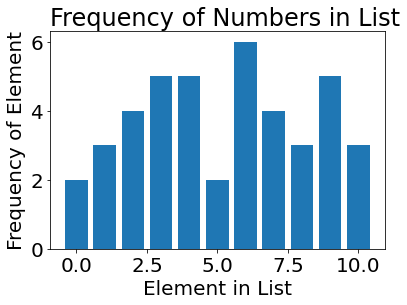

In [151]:
import matplotlib.pyplot as plt

#plotting a bar chart with frequency dictionary keys and values as x and y respectively
plt.bar(frequency.keys(), frequency.values())

plt.title("Frequency of Numbers in List", loc = 'left')
plt.xlabel("Element in List")
plt.ylabel("Frequency of Element")

plt.show()

In [152]:
import json

#writes new file with frequency dictionary
with open('midtermQ1.json', 'w') as fp:
    json.dump(frequency, fp,  indent=4)

In [155]:
#Question 2:
import pandas as pd

#important to note, data sample is a 20 day range of netflix activity
df = pd.read_csv(r"C:\Users\natha\OneDrive\Documents\Jupyter code\midterm project\Netflix Data Sample.csv")
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,3/20/2013 5:17,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)
1,Charlie,3/20/2013 4:27,0:44:31,NaN,Star Trek: Deep Space Nine: Season 5: Blaze of...,NaN,Mac,0:44:31,Not latest view,US (United States)
2,Charlie,3/20/2013 4:05,0:22:06,NaN,Star Trek: Deep Space Nine: Season 5: Children...,NaN,Mac,0:44:37,0:44:37,US (United States)
3,Charlie,3/20/2013 0:20,0:48:14,NaN,The Invisible War,NaN,Microsoft Xbox 360,0:53:18,0:53:18,US (United States)
4,Charlie,3/20/2013 0:10,0:04:51,NaN,The Invisible War,NaN,Mac,0:05:01,Not latest view,US (United States)


In [156]:
#drops other columns to only analyze time of play, duration, and device type
df = df.drop(['Profile Name', 'Attributes', 'Title', 'Supplemental Video Type', 'Bookmark', 'Latest Bookmark','Country'], axis=1)
df.head(1)

,Start Time,Duration,Device Type
0,3/20/2013 5:17,0:00:05,Mac


In [157]:
df.dtypes
#looking at data types, start time and duration need to be converted 

Start Time     object
Duration       object
Device Type    object
dtype: object

In [158]:
#start time must be converted to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)

#start time must convert timezone from UTC to EST
df = df.set_index('Start Time')
df.index = df.index.tz_convert('US/Eastern')
df = df.reset_index()

#duration must be converted to timedelta
df['Duration'] = pd.to_timedelta(df['Duration'])


#check the data types to confirm conversions were correct
df.dtypes

Start Time     datetime64[ns, US/Eastern]
Duration                  timedelta64[ns]
Device Type                        object
dtype: object

In [159]:
#filtering out by only certain device type, Mac
Mac = df[df['Device Type'].str.contains('Mac', regex=False)]

#checking that it worked
Mac.sample(10)

,Start Time,Duration,Device Type
31,2013-03-16 15:11:00-04:00,0 days 00:19:08,Mac
87,2013-03-12 11:55:00-04:00,0 days 00:21:40,Mac
62,2013-03-14 01:12:00-04:00,0 days 00:20:42,Mac
111,2013-03-11 12:19:00-04:00,0 days 00:15:37,Mac
80,2013-03-12 22:31:00-04:00,0 days 00:05:37,Mac
9,2013-03-18 19:25:00-04:00,0 days 00:00:02,Mac
82,2013-03-12 19:55:00-04:00,0 days 00:09:37,Mac
5,2013-03-19 18:34:00-04:00,0 days 00:22:29,Mac
88,2013-03-12 10:52:00-04:00,0 days 00:27:52,Mac
126,2013-03-10 16:42:00-04:00,0 days 00:18:47,Mac


In [161]:
#Filter out the outliers, duration should be longer than 1 minute, so that when the next episode accidentally loads it doesn't count
Mac = Mac[(Mac['Duration'] > '0 days 00:01:00')]
Mac.shape

(164, 3)

In [162]:
#Some analysis figures:

#Total duration of Netflix watched on Mac:
print("Total Time spent:", "", Mac['Duration'].sum())

print()
#Median duration of time spent on each show:
print("Median Time Spent:", "", Mac['Duration'].median())



Total Time spent:  2 days 11:34:17

Median Time Spent:  0 days 00:21:07.500000


In [164]:
#Analyzing weekday prevalence

Mac['weekday'] = Mac['Start Time'].dt.weekday

Mac.head()

,Start Time,Duration,Device Type,weekday
1,2013-03-20 00:27:00-04:00,0 days 00:44:31,Mac,2
2,2013-03-20 00:05:00-04:00,0 days 00:22:06,Mac,2
4,2013-03-19 20:10:00-04:00,0 days 00:04:51,Mac,1
5,2013-03-19 18:34:00-04:00,0 days 00:22:29,Mac,1
6,2013-03-19 01:07:00-04:00,0 days 00:33:10,Mac,1


In [167]:
%matplotlib inline
import matplotlib

#setting data so that days are plotted monday through sunday
Mac['weekday'] = pd.Categorical(Mac['weekday'], categories = [0,1,2,3,4,5,6], ordered=True)

#counting rows for each weekday, assigning results to Mac_day
Mac_day = Mac['weekday'].value_counts()

#setting order with monday (0) first, tuesday (1) second, etc.
Mac_day = Mac_day.sort_index()


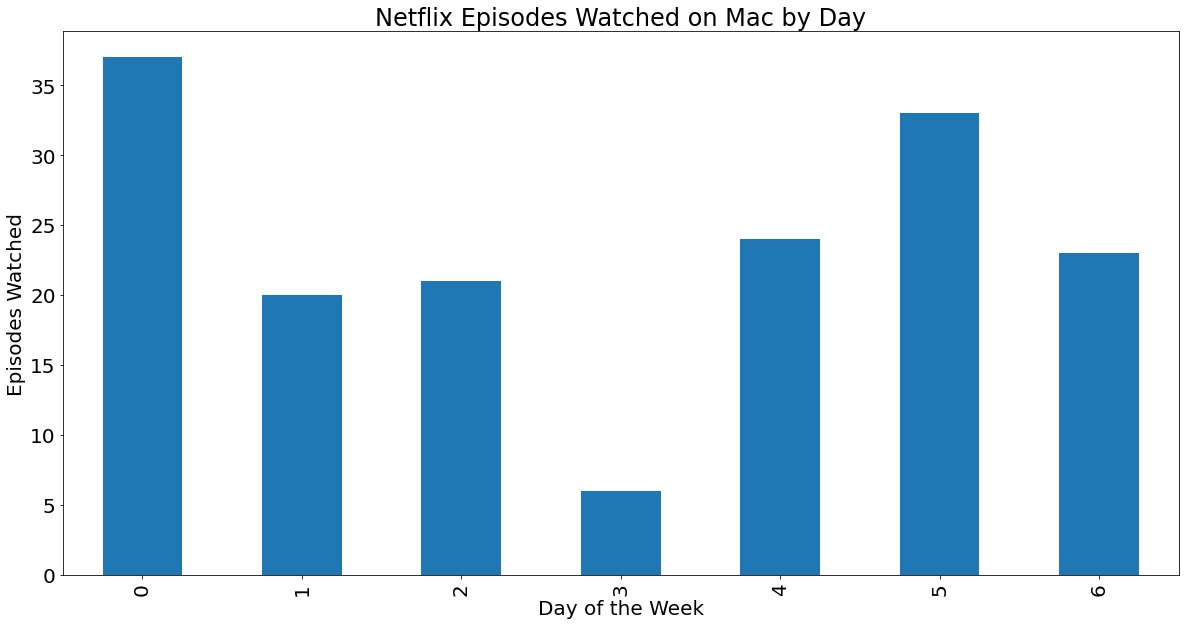

In [170]:
#plotting Mac_day as a bar chart

matplotlib.rcParams.update({'font.size': 20})
Mac_day.plot(kind = 'bar', figsize = (20,10), title = 'Netflix Episodes Watched on Mac by Day')
plt.xlabel("Day of the Week")
plt.ylabel("Episodes Watched")
plt.show()